In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create Dataframes
foreclosure_data = pd.read_csv('demand_data.csv')
foreclosure_data.head()

severe_weather2_data = pd.read_csv('severe_weather2.csv')
severe_weather2_data.head()

,index,Disaster,Disaster Type,Beginning Date,Ending Date,Total CPI-Adjusted Cost (Millions of Dollars),Deaths,Description,Event ID
0,0,Western Wildfires (Summer-Fall 2018),Wildfire,6/1/2018,9/30/2018,2200.0,15,California has again been impacted by a damagi...,10001
1,1,Southwest/Southern Plains Drought (Summer-Fall...,Drought,6/1/2018,9/30/2018,2800.0,0,Drought conditions were present across numerou...,10002
2,2,Hurricane Florence (September 2018),Tropical Cyclone,9/13/2018,9/16/2018,22500.0,51,Hurricane Florence was a large and very slow m...,10003
3,3,Colorado Hail Storm (June 2018),Severe Storm,6/18/2018,6/19/2018,2100.0,0,Severe hail storms cause golf ball to baseball...,10004
4,4,Texas Hail Storm (June 2018),Severe Storm,6/6/2018,6/6/2018,1000.0,0,Large-hail impacts highly-populated area of th...,10005


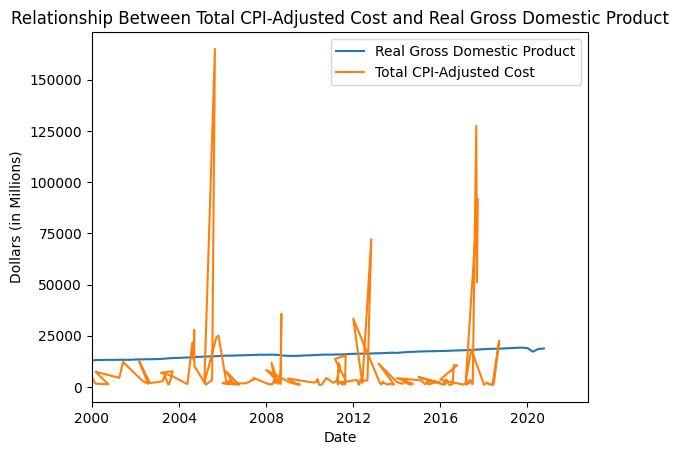

In [4]:
# Make sure all dates are in the correct format
foreclosure_data['DATE'] = pd.to_datetime(foreclosure_data['DATE'])
severe_weather2_data['Beginning Date'] = pd.to_datetime(severe_weather2_data['Beginning Date'])

# Visualize the relationship between the cost of extreme weather events and Real Gross Domestic Product
plt.plot(foreclosure_data['DATE'], foreclosure_data['GDPC1'], label='Real Gross Domestic Product')
plt.plot(severe_weather2_data['Beginning Date'], severe_weather2_data['Total CPI-Adjusted Cost (Millions of Dollars)'], label='Total CPI-Adjusted Cost')
plt.xlabel('Date')
plt.ylabel('Dollars (in Millions)')
plt.title('Relationship Between Total CPI-Adjusted Cost and Real Gross Domestic Product')
plt.legend()

# Set x-axis lower limit to 2000
plt.xlim(pd.Timestamp('2000-01-01'), None)

plt.show()

In [5]:
# Create Dataframe
housing_data = pd.read_csv('Housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


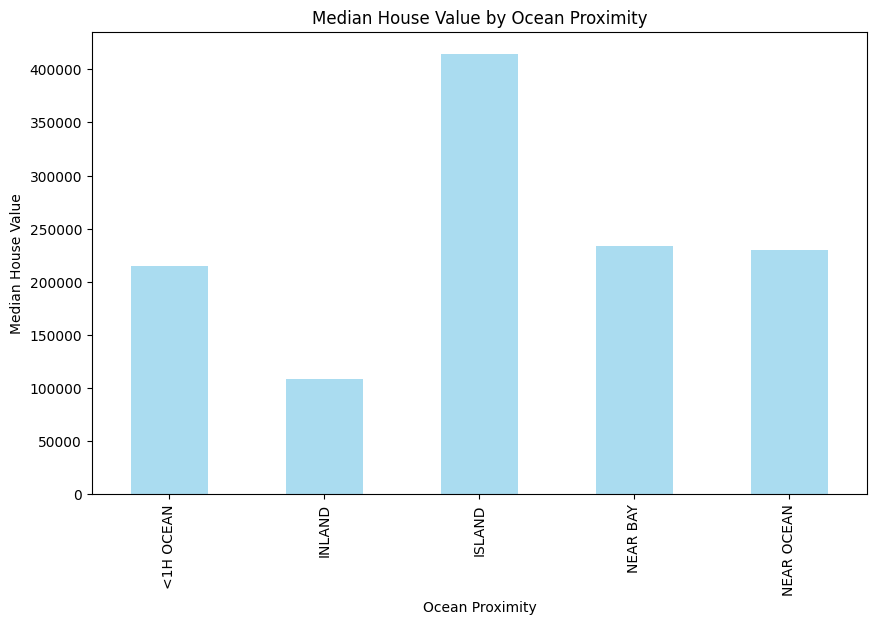

In [6]:
# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
housing_data.groupby('ocean_proximity')['median_house_value'].median().plot(kind='bar', color='skyblue', alpha=0.7)

# Add labels and title
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.title('Median House Value by Ocean Proximity')

# Show the plot
plt.show()

In [7]:
unemployment_data = pd.read_csv('unemployment_by_states.csv')

/var/folders/pq/m6vl_y3538g3szz78yf17pqr0000gn/T/ipykernel_73189/63078781.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  unemployment_data['Month and Year'] = pd.to_datetime(unemployment_data['Month and Year'])


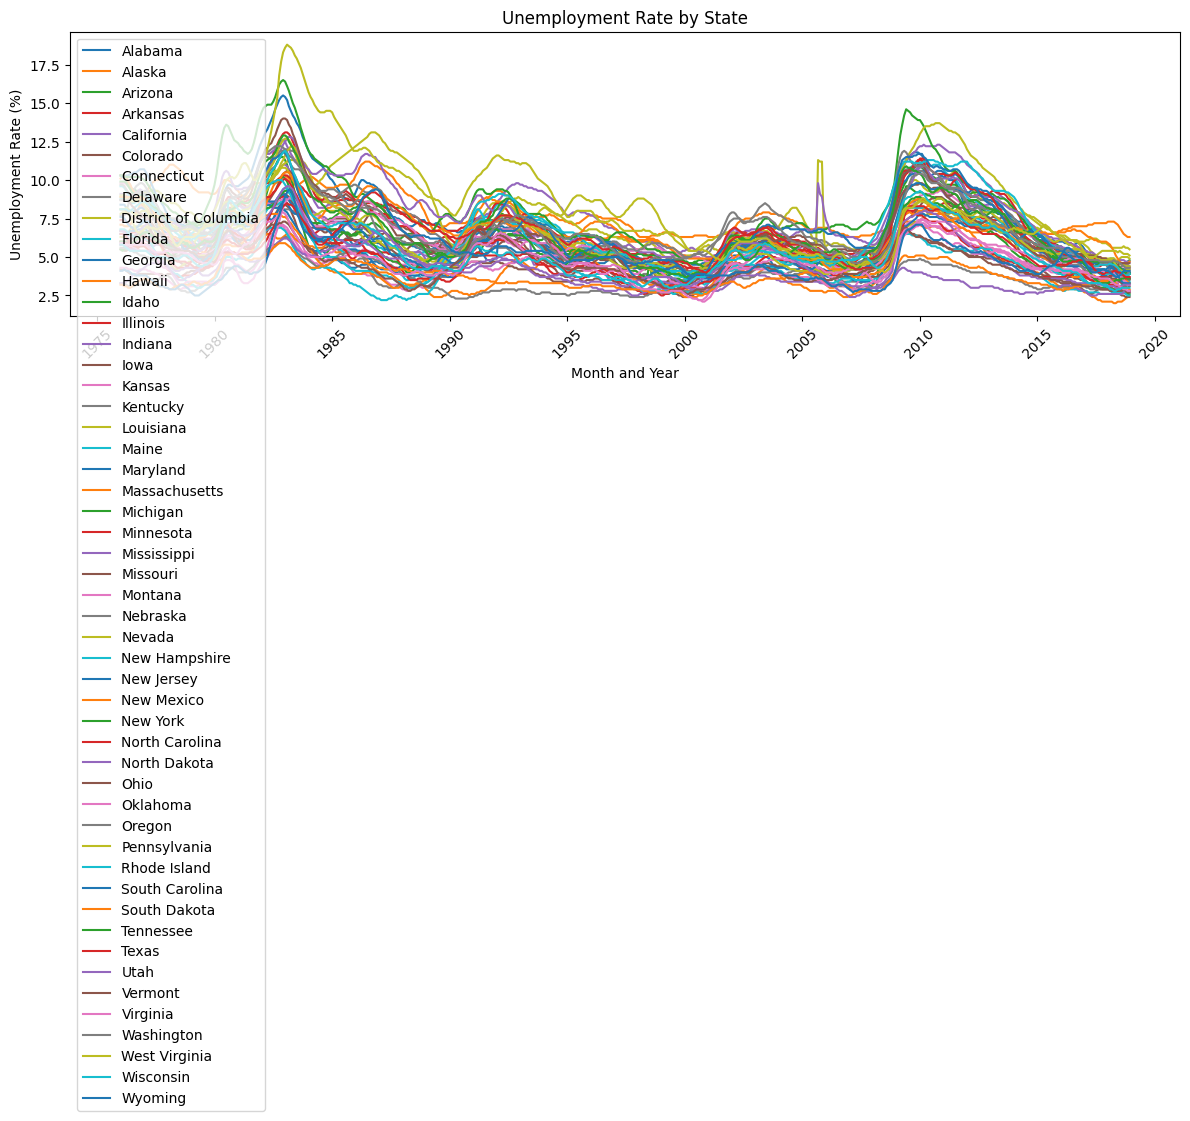

In [8]:
# Convert 'date' column to datetime format
unemployment_data['Month and Year'] = pd.to_datetime(unemployment_data['Month and Year'])

# Plot each state's unemployment rate as a separate line
plt.figure(figsize=(12, 8))  # Adjust figure size if needed

# Group by 'state' and plot each group separately
for State, data in unemployment_data.groupby('State'):
    plt.plot(data['Month and Year'], data['Unemployed - Percent of Labor Force'], label=State)

# Add labels and title
plt.xlabel('Month and Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate by State')
plt.legend(loc='upper left')  # Add legend

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [9]:
us_disaster_declarations = pd.read_csv('us_disaster_declarations.csv')

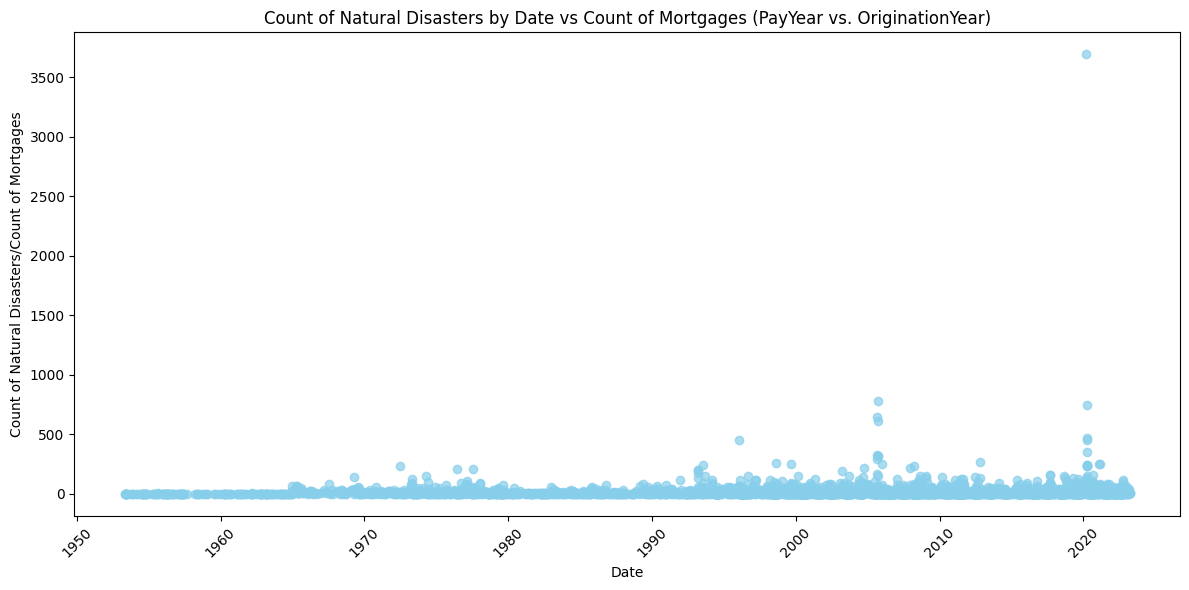

In [10]:
# Convert 'date' column to datetime format
us_disaster_declarations['declaration_date'] = pd.to_datetime(us_disaster_declarations['declaration_date'])

# Group by 'date' and count the number of occurrences of each date
count_by_date = us_disaster_declarations.groupby('declaration_date')['state'].count()

# Plot the scatter plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.scatter(count_by_date.index, count_by_date.values, color='skyblue', alpha=0.7)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Count of Natural Disasters/Count of Mortgages')
plt.title('Count of Natural Disasters by Date vs Count of Mortgages (PayYear vs. OriginationYear)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()